# Exercises: Week 1 (Example answers)

## 2. Get familiar with datasets

## A. Dogs at nursing homes

In [5]:
'''
Import modules and CSV files
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_crowley = pd.read_csv (r'data/crowley-1996.csv')
df_typing = pd.read_csv (r'data/smartphone-typing.csv')

print ('CROWLEY')
print ('-------')
print (df_crowley)
print ()
print ('TYPING')
print ('------')
print (df_typing)

CROWLEY
-------
      id condition  month  depression
0    101  resident      1           3
1    101  resident      2           3
2    101  resident      3           3
3    101  resident      4           3
4    101  resident      5           3
..   ...       ...    ...         ...
379  232   control      2           1
380  232   control      3           1
381  232   control      4           1
382  232   control      5           1
383  232   control      6           1

[384 rows x 4 columns]

TYPING
------
       id age_group  sentence  n_letters  trialtime  error_percent  backspaces
0     101     young         1         19      13696       0.052632           9
1     101     young         2         18      11080       0.000000           4
2     101     young         3         15       7774       0.000000           1
3     101     young         4         19      11943       0.000000           5
4     101     young         5         13       5169       0.000000           0
...   ...      

-------
1. Get to know the data. (1p)
    * Identify the between and within subjects variables/factors **Note that these relate to independent variables**
        - **Between: Condition (0.25p)**
        - **Within: Month (0.25p)**
    * How many participants were there in total? How many participants in each home?
        - **Total: 64 (0.25p)**
        - **Each home: 32 in control, 32 in resident (0.25p)**
   

In [2]:
'''
Get number of individual participants
'''

n_participant = len(np.unique(df_crowley['id']))

print ('Total number of participants: {}'.format(n_participant))
print ('--------')

'''
Get the number of participants in each home
'''

n_participant_control = len(df_crowley[df_crowley['condition'] == 'control'].groupby('id'))
n_participant_resident = len(df_crowley[df_crowley['condition'] == 'resident'].groupby('id'))

print ('Number of participants in each condition')
print ('Control: {}'.format(n_participant_control))
print ('Resident: {}'.format(n_participant_resident))

Total number of participants: 64
--------
Number of participants in each condition
Control: 32
Resident: 32


2. Describe the main response variable of the dataset, depression. How many responses, in total, are there in the three levels of depression? (1p)

    - **1: 205, 2: 95, 3: 84 (0.33p each)**

In [4]:
'''
Get number of responses in each depression level per month an on aggregate
'''

level_1 = len(df_crowley[df_crowley['depression'] == 1])
level_2 = len(df_crowley[df_crowley['depression'] == 2])
level_3 = len(df_crowley[df_crowley['depression'] == 3])

print ('Level 1: {}'.format(level_1))
print ('Level 2: {}'.format(level_2))
print ('Level 3: {}'.format(level_3))

Level 1: 205
Level 2: 95
Level 3: 84


3. Make another visualisation of the treatment. Create a bar graph, this time showing for each month and condition how the average depression level changed. How do you think the visualisations influence your interpretation of the results? (2p)

    - **(3p) for e.g.:**
     - **Clear graph**
     - **Frequency on y axis, month on x axix with correct labeling**
     - **Each month is represented on x axis**
     - **Bars for both conditions**
     - **Correct values identified**


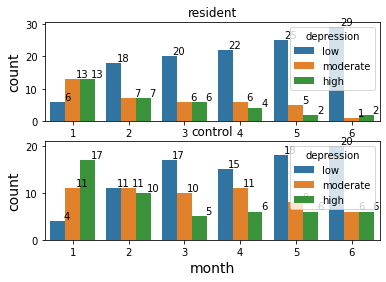

In [2]:
conditions = df_crowley.condition.unique()
dep_levels = df_crowley.depression.unique()
months = df_crowley.month.unique()

fig, axes = plt.subplots(nrows=2)

for i, cond in enumerate(conditions):

    ax = axes[i]

    content = {
        k: [] for k in ("month", "depression", "count")
    }

    labels = {1: 'low', 2: "moderate", 3:"high"}

    for m in months:

        is_cond = df_crowley.condition == cond
        is_month = df_crowley.month == m
        df_cond_m = df_crowley[is_cond & is_month]

        for dlevel in dep_levels:
            c = (df_cond_m.depression == dlevel).sum()
            content["month"].append(m)
            content["depression"].append(labels[dlevel])
            content["count"].append(c)

    df_plot = pd.DataFrame(content)


    graph=sns.barplot(x="month", y="count", hue="depression",
                hue_order=("low", "moderate", "high"),
                ax=ax,
                data=df_plot)
    
    # FROM: https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
    for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
    ax.set_ylabel("count", size=14)
    ax.set_xlabel("month", size=14)
    ax.set_title(cond)

plt.show()

4. Is there an internal validity threat in the starting ($m1$) depression between the groups? Investigate how $m_1$ differs between the groups, and provide your thoughts. (1p)

    - **The control and treatment group have a different baseline. Mean/count accepted.**

5. Make another visualisation of the treatment. Create a bar graph, this time showing for each month and condition how the average depression level changed. How do you think the visualisations influence your interpretation of the results? (2p)

    - **Correct values plotted (1p)**
    - **Valid comment about the interpretation of the results and their relationship to the previous diagram (e.g. both averages decreasing, which was difficult to read from the previous plot). (1p)**

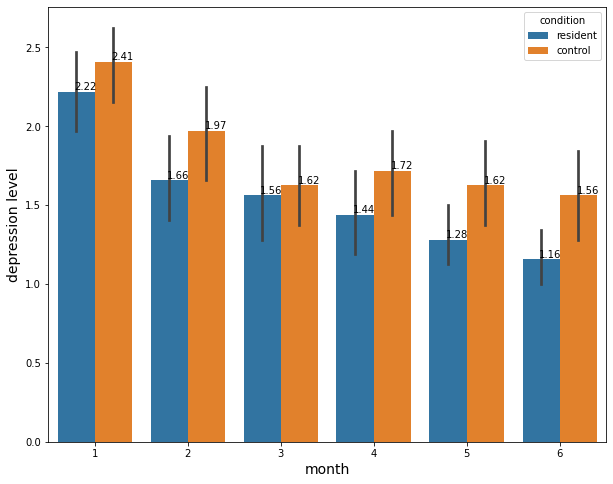

In [5]:
plt.figure(figsize=(10, 8))
graph = sns.barplot(x="month", y="depression", hue="condition", data=df_crowley)
# FROM: https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
for p in graph.patches:
    graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.ylabel("depression level", size=14)
plt.xlabel("month", size=14)
plt.show()

## B. Typing on a smartphone

1. Get to know the data.(1p)
    * Identify the between and within subjects variables / factors.
        - **Within subject: n_letters, sentence (0.25p)**
        - **Between subject: age_group (0.25p)**
    * How many participants are there? How many old and young adults
        - **Total: 24 (0.16p)**
        - **Old: 10 (0.16p)**
        - **Young: 14 (0.16p)**



In [6]:
'''
Get number of individual participants
'''

n_participant = len(np.unique(df_typing['id']))

print ('Number of participants')
print (n_participant)
print ('\n')

'''
Get the number of participants in each home
'''

print ('Number of participants in each condition')
print ("old: {}".format(df_typing.groupby('age_group')['id'].value_counts()['old'].shape[0]))
print ("young: {}".format(df_typing.groupby('age_group')['id'].value_counts()['young'].shape[0]))


Number of participants
24


Number of participants in each condition
old: 10
young: 14


2. Create a new variable, called $cps$, which indicates, on average, how many characters the participant typed in a second. In other words, for each sentence, divide the number of letters by trial time. Note that $trialtime$ is in milliseconds, but we wish $cps$ to be characters per second. Please report the summary statistics of this new variable: its minimum and maximum values, its mean, and its standard deviation. Also provide a histogram showing the distribution of the variable. (1p)

    - **$cps$ correctly calculated (0.5p)**
    - **Summary statistics correctly calculated (0.25p)**
    - **Histogram plotted (0.25p)**


------------------
SUMMARY STATISTICS
------------------
Min: 0.13116630695300668
Max: 24.324324324324326
Mean: 2.1809304352172387
STD: 1.3893187081636398
---------
HISTOGRAM
---------


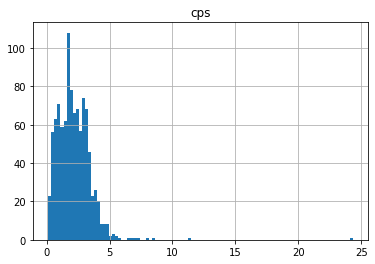

In [3]:
df_typing['cps'] = df_typing['n_letters'] / (df_typing['trialtime'] / 1000)


cps_min = df_typing['cps'].min()
cps_max = df_typing['cps'].max()
cps_mean = df_typing['cps'].mean()
cps_std = df_typing['cps'].std()

print ('------------------')
print ('SUMMARY STATISTICS')
print ('------------------')
print ("Min: {}".format(cps_min))
print ("Max: {}".format(cps_max))
print ("Mean: {}".format(cps_mean))
print ("STD: {}".format(cps_std))

df_typing.hist(column='cps', bins=100)

print ('---------')
print ('HISTOGRAM')
print ('---------')
plt.show()

3. How did the old and young adults, in general, differ in their typing speed ($cps$)? Provide a boxplot of participant-specific average $cps$ to support your answer: for each participant, calculate their own mean $cps$, and use these results to make a boxplot, that shows the differences between young and old adults. (4p)

    - **Boxplot of participant specific average $cps$ (1p)**
    - **Boxplot of differences between old and young adults (1p)**
    - **Some valid comment that answers the first question, including references to the plots (2p)**

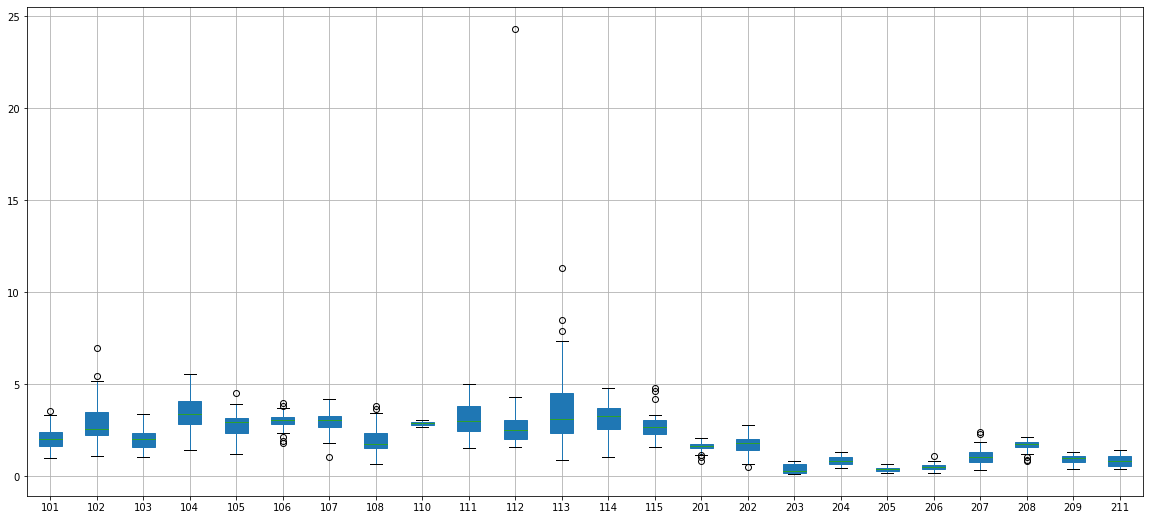

In [8]:
d = {'young': 0, 'old': 1}

df_typing['mapped'] = df_typing['age_group'].map(d)

grouped = df_typing.groupby('id')

columns = np.unique(df_typing['id'])

id_data = {}

for p_id in columns:
    id_data[p_id] = grouped.get_group(p_id)['cps'].agg(lambda x: x.tolist())
    
df_box = pd.DataFrame.from_dict(id_data, orient='index')

plotted = df_box.transpose().boxplot(figsize=(20,9), return_type='both', patch_artist=True)

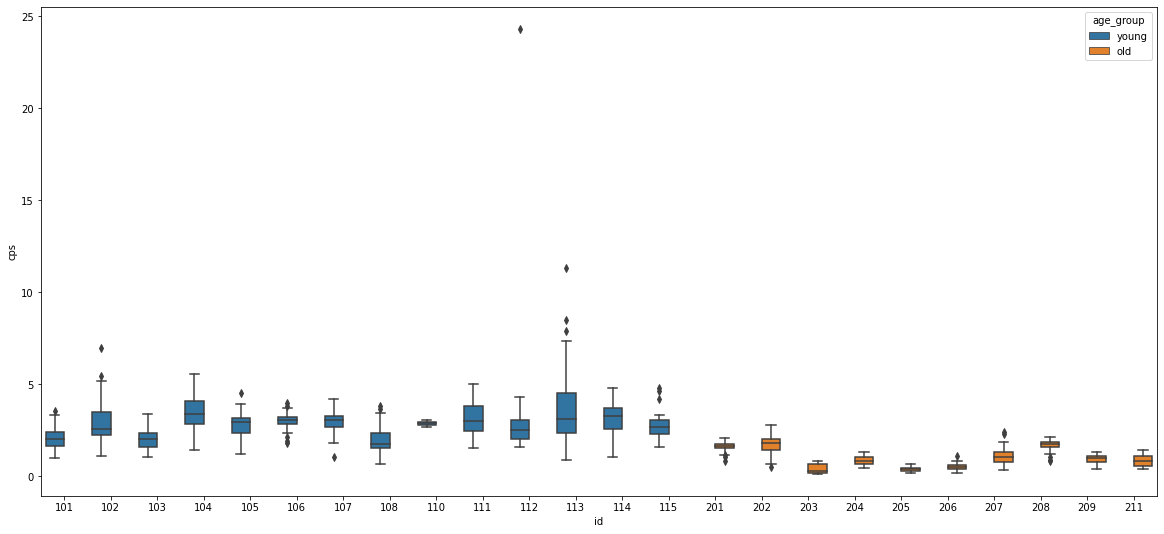

In [9]:
fig, ax = plt.subplots(figsize=(20,9))
sns.boxplot(x="id", y="cps", hue='age_group', data=df_typing, ax=ax)

plt.show()

In [10]:
# Calculate mean cps for each participant

df_id = df_typing.groupby('id').mean()

print (df_id.head())

      sentence  n_letters  trialtime  error_percent  backspaces       cps  \
id                                                                          
101  25.500000  17.820000    9350.04       0.004851    2.680000  2.084664   
102  26.088889  17.755556    6890.20       0.499302    0.777778  2.895769   
103  25.500000  17.820000    9656.74       0.000000    3.220000  2.037604   
104  25.500000  17.820000    5687.94       0.000000    1.400000  3.428032   
105  25.500000  17.820000    6811.36       0.001111    1.000000  2.779482   

     mapped  
id           
101     0.0  
102     0.0  
103     0.0  
104     0.0  
105     0.0  


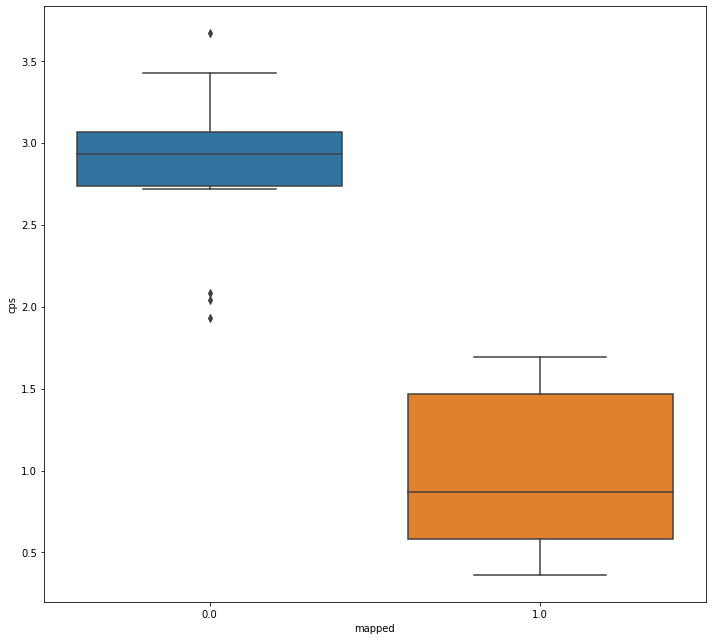

In [11]:
fig, ax = plt.subplots(figsize=(10,9))
sns.boxplot(x="mapped", y="cps", data=df_id, ax=ax)

plt.tight_layout()
plt.show()

4. Create a scatter plot of cps vs. error rate. What do you see? (2p)

    - **Correctly plotted scatter plot (1p)**
    - **Some valid comment about the results (e.g. a lot of zeros, no obvious patter, etc.) (1p)**

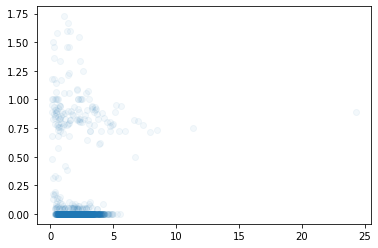

In [13]:
# Scatter plot cps vs. error percent

is_old = df_typing['age_group'] == 'old'

plt.scatter(df_typing['cps'], df_typing['error_percent'], alpha=0.05)

plt.show()